# ANOVA on Advertising dataset

## Submitted by: Group 7

## Contributors: *Fen Francis Pereira, Jayaram K, Ashmina T.*

**Objective:** Do the following on the dataset  
1. Explain the dataset
2. Check the summary statistics and discuss the max, min, avg, median,
and percentiles.
3. The manager wants to find out whether the same amount was spent
for the three advertisements (TV , Radio and Newspaper). Comment
on your findings.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
#loading the dataset
ad_data = pd.read_csv('Advertising.csv')

### 1. Explain the dataset

In [3]:
#displaying first 5 rows
ad_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


The dataset contains statistics about the sales of a product in different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
The sales are in thousands of units and the budget is in thousands of dollars.

In [4]:
#removing the column 'Unnamed: 0' as it is redundant
data = ad_data.drop('Unnamed: 0',axis=1)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#getting the shape of the dataset
data.shape

(200, 4)

This dataset contains 200 rows and 4 columns

In [7]:
#getting the concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


There are 200 non-null float values in each column

In [8]:
#checking for null values
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no null(missing) values in the dataset.

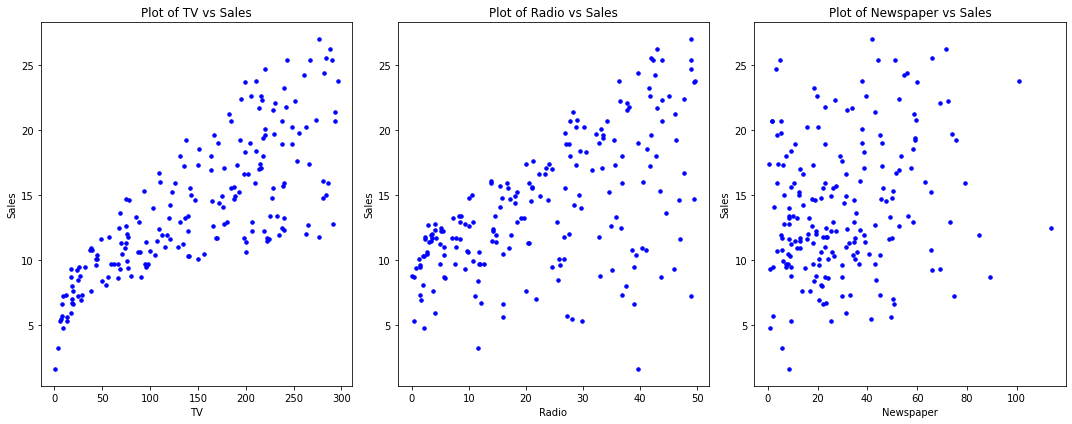

In [9]:
#scatterplot
plt.figure(figsize = (15,6))   
#scatterplot of TV Vs Sales
plt.subplot(1,3,1)
plt.scatter(data['TV'],data['Sales'],s = 12, c = 'blue') 
plt.title('Plot of TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

#scatterplot of Radio Vs Sales
plt.subplot(1,3,2)
plt.scatter(data['Radio'],data['Sales'],s = 12, c = 'blue') 
plt.title('Plot of Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

#scatterplot of Newspaper Vs Sales
plt.subplot(1,3,3)
plt.scatter(data['Newspaper'],data['Sales'],s = 12, c = 'blue') 
plt.title('Plot of Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()

* We can see that TV is the consistent generator of Sales, the values are not scattered much for TV, so we can say that there is a genuine increase in sales with respect to amount spend for TV.  
* In the case of Radio and Newspaper, we see that they are scattered and there is no consistency in making Sales.  
* When we compare Radio and Newspaper, we can see that eventhough management spend almost double for Newspaper, there is no significant increase in sales.

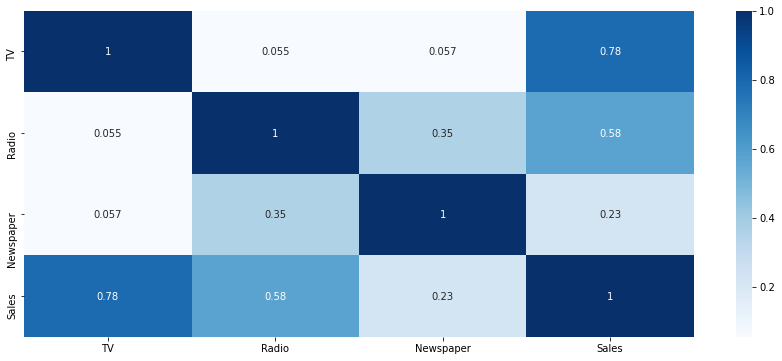

In [10]:
#heatmap for correlation
plt.figure(figsize = (15,6)) 
sns.heatmap(data.corr(),annot=True, cmap='Blues');

TV is having strong positive correlation with Sales and hence the most effective mode of advertisement.

### 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [11]:
#getting the summary statistics of the dataset
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


* The mean of all the four columns are almost similar to their respective medians. So the data can be considered as normally distributed.  
* We can see that average amount spend is high for TV and low for Radio. So, we can say that TV is the most expensive advertisement mode and Radio is the least expensive.  
* The maximum amount spend is for TV and the minimum amount spend is for Radio.  
* Among the three modes of advertisement, TV is having the highest standard deviation and Radio is having the lowest standard deviation.

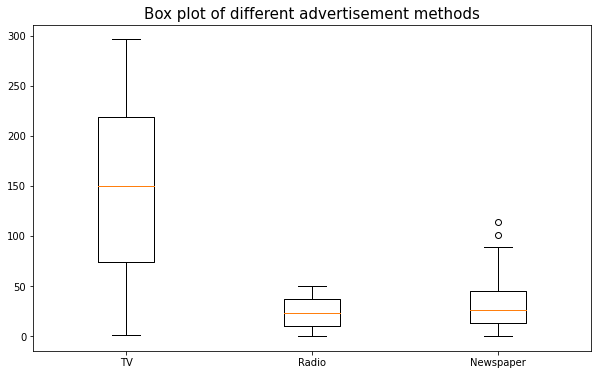

In [12]:
#boxplot
plt.figure(figsize=(10,6))
plt.boxplot(data[['TV','Radio','Newspaper']])
plt.title("Box plot of different advertisement methods",fontsize=15)
plt.xticks([1,2,3],["TV","Radio","Newspaper"])
plt.show()

There are two outliers for Newspaper. Eventhough the Newspaper is having a median value of about 25, the outliers drifted the mean value to 30 which is slightly higher than the median value.

### 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

Here we have to use One-way ANOVA test. 

**H<sub>0</sub> :** All the population means are equal(μ1 = μ2 = μ3), i.e. amount spent for the three advertisements are equal.  
**H<sub>a</sub> :** At least one population mean is different from the rest,i.e. amount spent for the three advertisements are not all equal.

In [13]:
#setting the signicance level(alpha)
alpha = 0.05

In [14]:
#calculating f-statistic and p-value
f, p = f_oneway(data['TV'],data['Radio'],data['Newspaper'])
print("f-statistic:",f)
print("p-value:",p)

f-statistic: 358.8514595342597
p-value: 4.552931539744962e-103


In [15]:
#comparing p-value and alpha
if p < alpha:
    print('We reject null hypothesis, that means the amount spent for the three advertisements are not all equal.')
else:
    print('We accept null hypothesis, that means the amount spent for the three advertisements are equal.')

We reject null hypothesis, that means the amount spent for the three advertisements are not all equal.
